# Importing Libraries

In [1]:
#Preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from pylab import rcParams
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

# Loading Dataset

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')
riders = pd.read_csv('Riders.csv')

In [3]:
#Displaying the dataframes
display(train.head())
display(test.head())
display(variables.head())
display(riders.head())

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.400,nan,-1.318,36.830,-1.300,36.830,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.400,nan,-1.351,36.899,-1.295,36.814,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,nan,nan,-1.308,36.843,-1.301,36.828,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.200,nan,-1.281,36.832,-1.257,36.795,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.400,nan,-1.267,36.792,-1.295,36.810,Rider_Id_770,1214


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,nan,nan,-1.333,36.871,-1.305,36.822,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,nan,nan,-1.273,36.795,-1.277,36.824,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.800,nan,-1.291,36.823,-1.277,36.851,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.500,nan,-1.291,36.810,-1.303,36.791,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.400,nan,-1.281,36.814,-1.266,36.792,Rider_Id_858


,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.000,1159
1,Rider_Id_479,360,951,13.500,176
2,Rider_Id_648,1746,821,14.300,466
3,Rider_Id_753,314,980,12.500,75
4,Rider_Id_335,536,1113,13.700,156


In [4]:
display(train.info())
display(test.info())
display(riders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


None


Too many null values in 'Precipitation' , only 552 rows are not nulls. This row should be dropped. 'Temperature' has a considerable amoubt of nulls 4366 exactly. We can keep it and try to see if we can impute values or use it as is.

### First lets concat the riders/train, and add the riders' infos to the train dataset.


In [5]:
train = pd.merge(train,riders,on='Rider Id',how='left')
test = pd.merge(test,riders,on='Rider Id',how='left')

# Exploratory Data Analysis

In [6]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [7]:
#The description of the column
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,...,552.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000,21201.000
mean,2.752,15.654,3.240,15.654,3.240,15.654,3.240,15.654,3.240,15.654,...,7.906,-1.281,36.811,-1.283,36.811,1556.921,1692.424,984.743,13.883,341.067
std,0.625,8.799,1.567,8.799,1.567,8.799,1.567,8.799,1.567,8.799,...,17.090,0.031,0.037,0.035,0.045,987.271,1574.308,646.653,0.916,402.868
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.100,-1.438,36.654,-1.430,36.607,1.000,2.000,96.000,0.000,0.000
25%,3.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,...,1.075,-1.301,36.785,-1.301,36.786,882.000,557.000,495.000,13.600,61.000
50%,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,...,2.900,-1.279,36.807,-1.284,36.808,1369.000,1212.000,872.000,14.000,161.000
75%,3.000,23.000,5.000,23.000,5.000,23.000,5.000,23.000,5.000,23.000,...,4.900,-1.257,36.830,-1.261,36.829,2040.000,2311.000,1236.000,14.300,495.000
max,4.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,...,99.100,-1.147,36.991,-1.030,37.017,7883.000,9756.000,3764.000,15.200,2298.000


In [8]:
# The Precipitation in millimeters has a lot of NaN values on both test & train datasets
train.drop('Precipitation in millimeters', axis=1, inplace=True)
test.drop('Precipitation in millimeters', axis=1, inplace=True)

### Lets start with the 'Time from Pickup to Arrival'

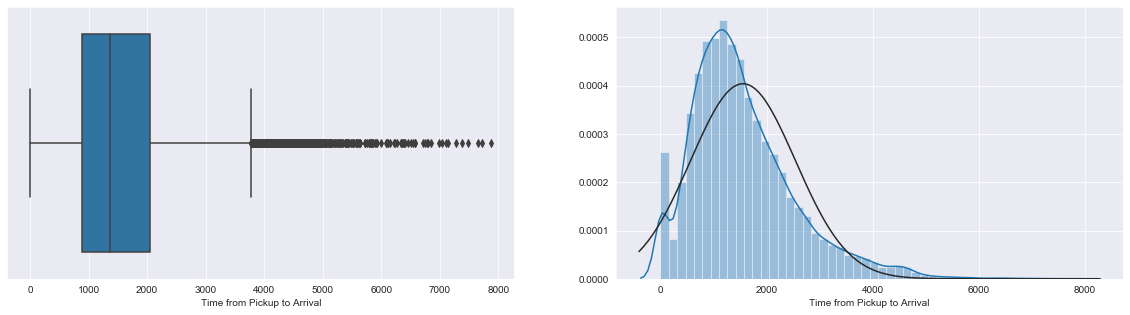

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(train["Time from Pickup to Arrival"], ax=ax[0])
sns.distplot(train["Time from Pickup to Arrival"], fit=norm, ax=ax[1])

### Temperature histogram

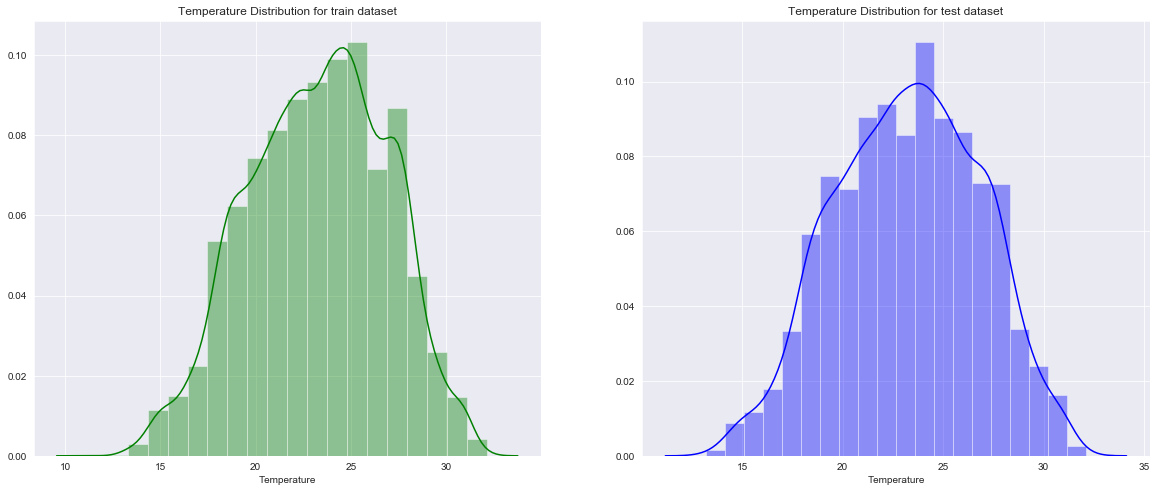

In [11]:
# Addressing the NaN values in the Temperature column
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Temperature Distribution for train dataset')
ax[1].set_title('Temperature Distribution for test dataset')
sns.distplot(train['Temperature'], bins=20, ax=ax[0], color='green')
sns.distplot(test['Temperature'], bins=20, ax=ax[1], color = 'blue')

The most common temperature is around 25 degrees in Celsius for both datasets.

### Platform Types

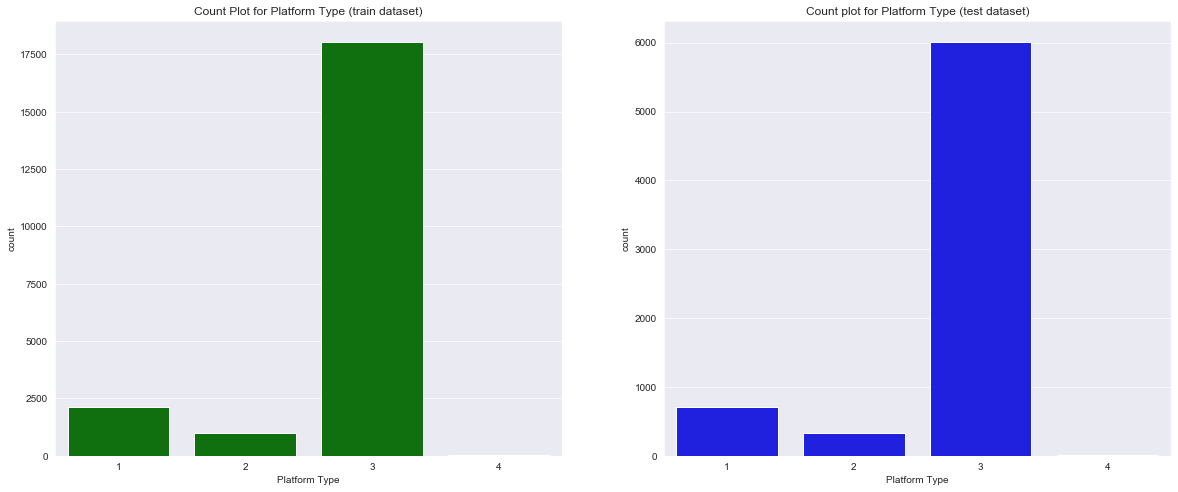

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Platform Type (train dataset)')
ax[1].set_title('Count plot for Platform Type (test dataset)')
sns.countplot(x = 'Platform Type', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Platform Type', data = test, color = 'blue', ax=ax[1])

### Personal or Business

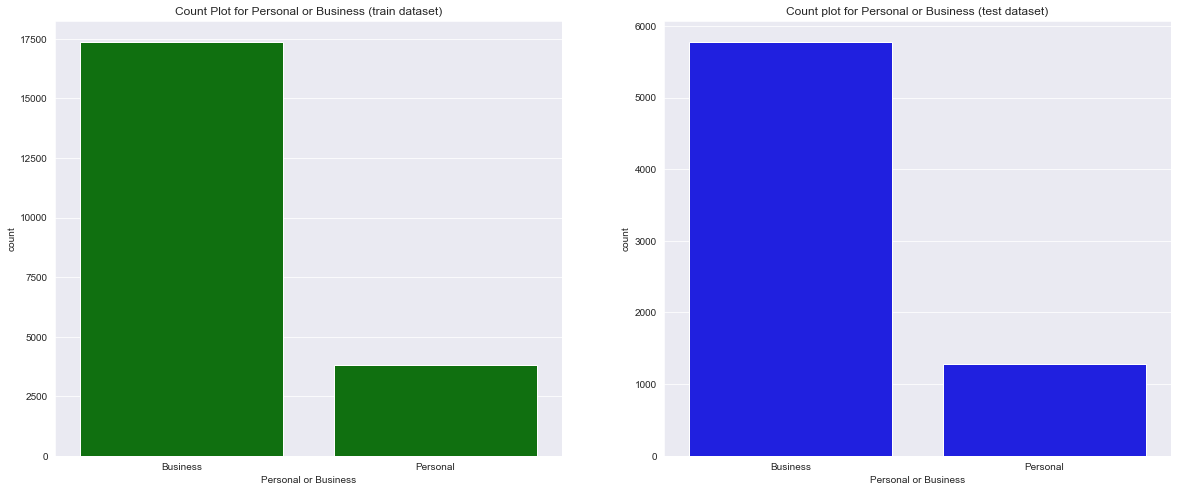

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Personal or Business (train dataset)')
ax[1].set_title('Count plot for Personal or Business (test dataset)')
sns.countplot(x = 'Personal or Business', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Personal or Business', data = test, color = 'blue', ax=ax[1])

### Arrival at Pickup Day of Month

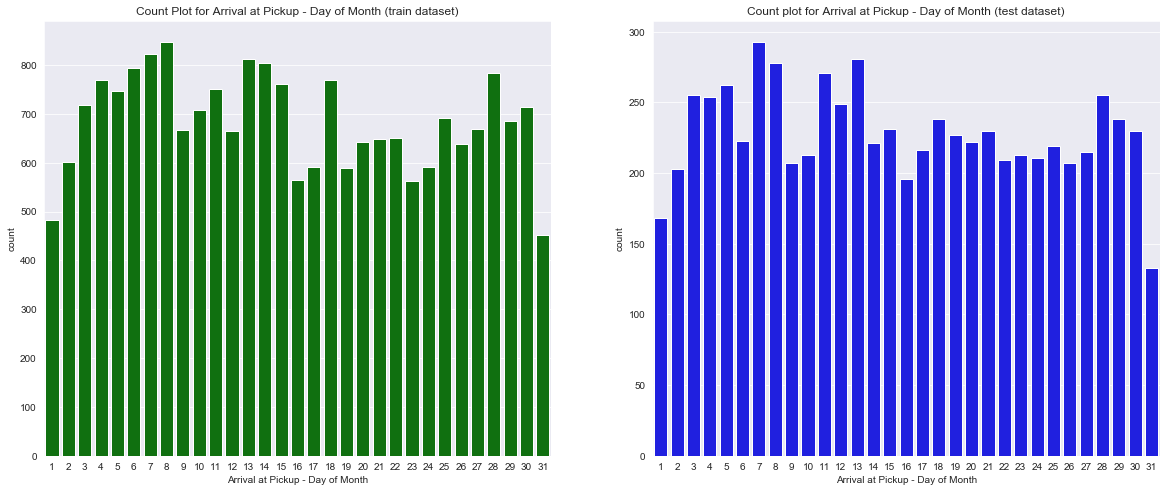

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Arrival at Pickup - Day of Month (train dataset)')
ax[1].set_title('Count plot for Arrival at Pickup - Day of Month (test dataset)')
sns.countplot(x = 'Arrival at Pickup - Day of Month', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Arrival at Pickup - Day of Month', data = test, color = 'blue', ax=ax[1])

### Arrival at Pickup Weekday

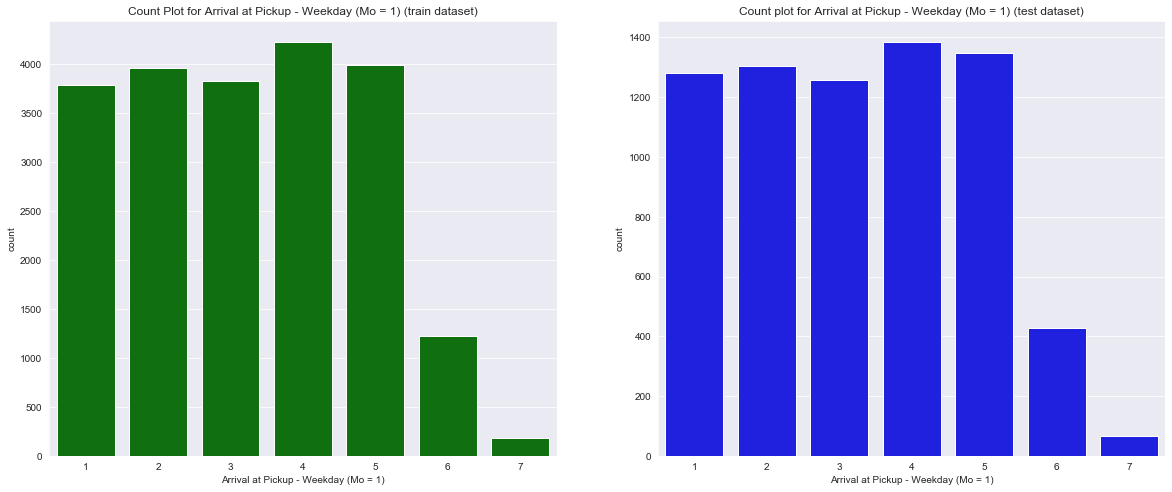

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Count Plot for Arrival at Pickup - Weekday (Mo = 1) (train dataset)')
ax[1].set_title('Count plot for Arrival at Pickup - Weekday (Mo = 1) (test dataset)')
sns.countplot(x = 'Arrival at Pickup - Weekday (Mo = 1)', data = train, color = 'green', ax=ax[0])
sns.countplot(x = 'Arrival at Pickup - Weekday (Mo = 1)', data = test, color = 'blue', ax=ax[1])

So the weekend is less busy compared to the other week days. Something we have to keep in mind.

### Lets extract the hour/minute/seconds from the Arrival Pickup Time

In [16]:
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])

In [17]:
train['Pickup_Hour'] = train['Pickup - Time'].dt.hour
train['Pickup_Minutes'] = train['Pickup - Time'].dt.minute
train['Pickup_Seconds'] = train['Pickup - Time'].dt.second
train['Arrival_Destination_Hour'] = train['Arrival at Destination - Time'].dt.hour
train['Arrival_Destination_Minutes'] = train['Arrival at Destination - Time'].dt.minute
train['Arrival_Destination_Seconds'] = train['Arrival at Destination - Time'].dt.second

#### Let us plot the hours at pickup

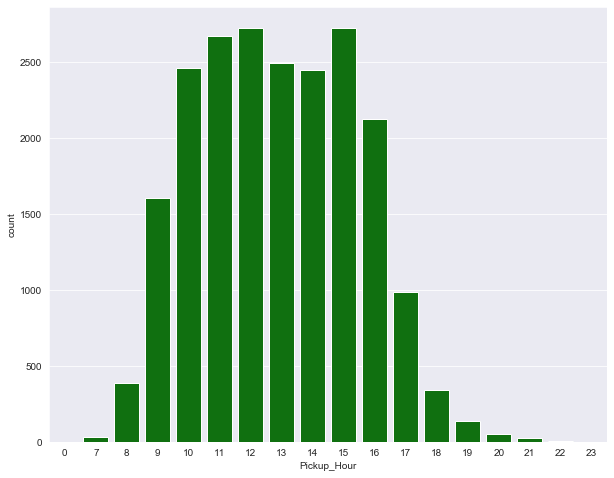

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x = 'Pickup_Hour', data = train, color = 'green', ax=ax)

The usual pickup hours are from 9 AM till at about 5 PM, heavily concentrated during business hours

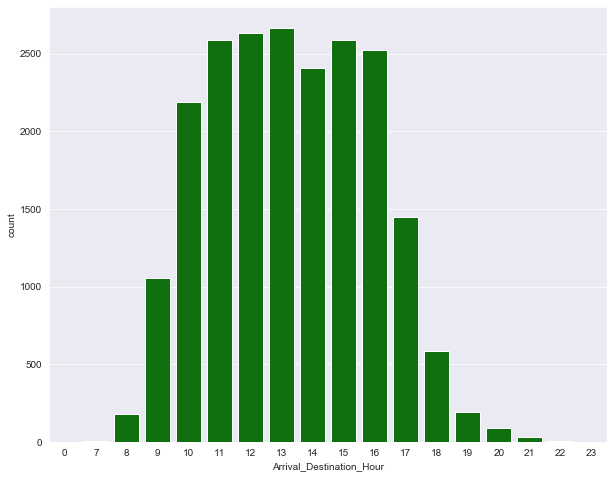

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x = 'Arrival_Destination_Hour', data = train, color = 'green', ax=ax)

The destination Arrival hours seems to match the Pickup Hours

In [20]:
## convert target from seconds to minutes.
train['Time_from_Pickup_to_Arrival_Minutes'] = train['Time from Pickup to Arrival']/60

### The most important variable : Distance (KM)

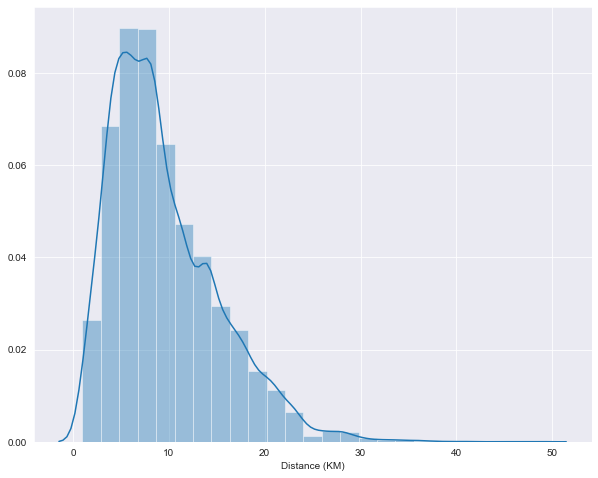

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(train['Distance (KM)'], bins = 25)

Most of the rides are under 15 KM

### Speed?


Something useful we could do, is to generate a feature 'Speed' of each order. Set up a threshold of acceptable speed of a bike, and eliminate the possible outliers later. Lets generate it.

Breaking down distance to meters and keep time in seconds, and convert it to minutes

In [22]:
train['Speed_Meter_per_Second'] = (train['Distance (KM)']*1000)/train['Time from Pickup to Arrival'] ##meter per second

train.Speed_Meter_per_Second.describe()

count   21201.000
mean       69.251
std       529.249
min         0.256
25%         4.573
50%         6.407
75%         8.413
max     17000.000
Name: Speed_Meter_per_Second, dtype: float64

#### Outlier Free Speed

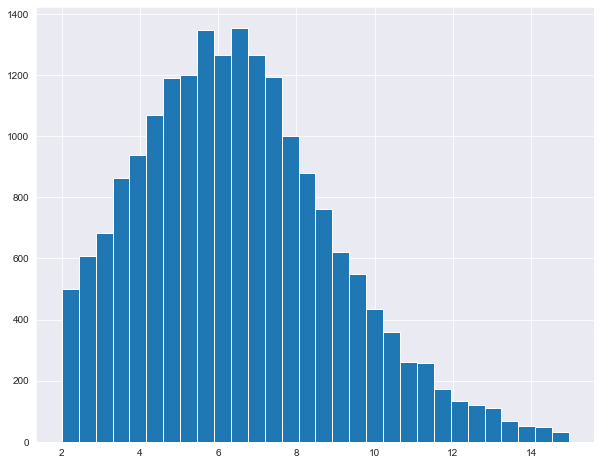

In [23]:
OutliersTrain = train[(train['Speed_Meter_per_Second'] >= 15)|(train['Speed_Meter_per_Second'] <= 2)]#.sort_values(by='Speed_Meter_per_',ascending=False)
OutlierFreeTrain = train[~(train['Order No'].isin(OutliersTrain['Order No']))]
hist_Speedmin = OutlierFreeTrain['Speed_Meter_per_Second'].hist(bins=30,figsize=[10,8])

Speed's distribution when outliers are excluded from the data.

In [24]:
print('We have probably %i outliers , we might have classified a few normal ones as outliers though.'%(len(OutliersTrain)))

We have probably 1856 outliers , we might have classified a few normal ones as outliers though.


In [25]:
OutlierFreeTrain.Speed_Meter_per_Second.describe()

count   19345.000
mean        6.518
std         2.506
min         2.001
25%         4.662
50%         6.324
75%         8.065
max        14.970
Name: Speed_Meter_per_Second, dtype: float64

Let's get the ID's of the riders that cause these outliers and see if there's a trend.

In [26]:
plot1=train[train['Speed_Meter_per_Second'] >= 15]
riders['WrongOrders'] = riders['Rider Id'].map(plot1.groupby('Rider Id').agg('count').sort_values(by='Order No',ascending=False)['Order No'])

In [27]:
train['Total_Orders'] = train['Rider Id'].map(train.groupby('Rider Id').agg('count')['Order No'])
train = pd.merge(train,riders.drop(['No_of_Ratings','Average_Rating','Age','No_Of_Orders'],axis=1),on='Rider Id',how='left')
test = pd.merge(test,riders.drop(['No_of_Ratings','Average_Rating','Age','No_Of_Orders'],axis=1),on='Rider Id',how='left')
train['error_rate_rider'] = train['WrongOrders']/train['Total_Orders']
test['error_rate_rider'] = test['Rider Id'].map(train['error_rate_rider'])

In [28]:
len(train[train.error_rate_rider>=0.5])

506

Do the train and test sets share the same riders? lets see.

In [29]:
print('Number of unique riders in train set : %i and in test set : %i '%(len(train['Rider Id'].unique()),len(test['Rider Id'].unique())))

Number of unique riders in train set : 924 and in test set : 822 


In [30]:
riderstrainonly = len(train[~(train['Rider Id'].isin(test['Rider Id'].unique()))]['Rider Id'].unique())
riderstestonly = len(test[~(test['Rider Id'].isin(train['Rider Id'].unique()))]['Rider Id'].unique())
print('Number of riders existing only in trainset? %i ; Number of riders only in test set? %i ' %(riderstrainonly,riderstestonly))

Number of riders existing only in trainset? 130 ; Number of riders only in test set? 28 


#### always late riders?

In [31]:
idxlate=train[train.Speed_Meter_per_Second<=5][['Distance (KM)','Speed_Meter_per_Second','Time from Pickup to Arrival','Time_from_Pickup_to_Arrival_Minutes']].index
train.iloc[idxlate]['Rider Id'].value_counts().head(5)

Rider_Id_268    78
Rider_Id_519    74
Rider_Id_844    62
Rider_Id_88     59
Rider_Id_660    58
Name: Rider Id, dtype: int64

In [32]:
print('We have %i orders that took too long to reach its destination. '%(len(train[train.Speed_Meter_per_Second<2])))

We have 684 orders that took too long to reach its destination. 


In [33]:
latetrain = train[(train.Speed_Meter_per_Second<=2)].copy()
latetrain.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup_Minutes,Pickup_Seconds,Arrival_Destination_Hour,Arrival_Destination_Minutes,Arrival_Destination_Seconds,Time_from_Pickup_to_Arrival_Minutes,Speed_Meter_per_Second,Total_Orders,WrongOrders,error_rate_rider
count,686.000,686.000,686.000,686.000,686.000,686.000,686.000,686.000,686.000,686.000,...,686.000,686.000,686.000,686.000,686.000,686.000,686.000,686.000,390.000,390.000
mean,2.847,16.083,3.270,16.083,3.270,16.083,3.270,16.083,3.270,16.083,...,28.641,29.866,14.019,28.245,30.625,45.884,1.501,55.889,3.841,0.071
std,0.517,8.825,1.515,8.825,1.515,8.825,1.515,8.825,1.515,8.825,...,17.318,17.264,2.463,17.196,17.151,24.880,0.383,46.451,5.101,0.067
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,8.000,0.000,0.000,8.333,0.256,1.000,1.000,0.008
25%,3.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,...,13.000,15.000,12.000,13.000,17.000,25.712,1.270,21.000,1.000,0.022
50%,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,...,28.000,31.000,14.000,28.000,30.000,44.567,1.576,41.000,2.000,0.051
75%,3.000,24.000,5.000,24.000,5.000,24.000,5.000,24.000,5.000,24.000,...,44.000,44.000,16.000,42.000,46.000,63.617,1.812,77.000,4.000,0.095
max,4.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,...,59.000,59.000,22.000,59.000,59.000,128.567,2.000,247.000,31.000,0.419


In [34]:
fasttrain= train[(train.Speed_Meter_per_Second>=15)].copy()
fasttrain.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup_Minutes,Pickup_Seconds,Arrival_Destination_Hour,Arrival_Destination_Minutes,Arrival_Destination_Seconds,Time_from_Pickup_to_Arrival_Minutes,Speed_Meter_per_Second,Total_Orders,WrongOrders,error_rate_rider
count,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,...,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000
mean,2.938,15.844,3.198,15.844,3.198,15.844,3.198,15.844,3.198,15.844,...,29.411,29.101,13.137,29.549,30.924,2.783,1146.230,50.188,12.154,0.298
std,0.333,8.843,1.565,8.843,1.565,8.843,1.565,8.843,1.565,8.843,...,17.032,17.049,2.574,17.035,17.153,5.155,1962.382,38.790,11.758,0.255
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.017,15.000,1.000,1.000,0.008
25%,3.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,2.000,8.000,...,15.000,15.000,11.000,15.000,16.000,0.067,32.609,23.000,3.000,0.087
50%,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,3.000,15.000,...,29.000,28.000,13.000,29.000,31.000,0.225,285.714,42.000,7.000,0.196
75%,3.000,24.000,4.000,24.000,4.000,24.000,4.000,24.000,4.000,24.000,...,44.000,44.000,15.000,44.000,46.000,3.188,1333.333,63.500,19.000,0.565
max,4.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,7.000,31.000,...,59.000,59.000,22.000,59.000,59.000,37.400,17000.000,247.000,40.000,1.000


#### Age binning

In [35]:
train['Age_Year'] = train['Age']/365
train['Age_Month'] = train['Age']/30
train['Age_Year']=round(train['Age_Year'])
train['Age_Month'] = round(train['Age_Month'])

#### Rush hours

In [36]:
train.Pickup_Hour.value_counts()

12    2725
15    2720
11    2669
13    2493
10    2459
14    2443
16    2121
9     1606
17     984
8      385
18     343
19     138
20      53
7       34
21      22
22       4
23       1
0        1
Name: Pickup_Hour, dtype: int64

In [37]:
train.loc[(train['Pickup_Hour']>=7)&(train['Pickup_Hour']<9),'DayTime']= 'Rush_Hour1'
train.loc[(train['Pickup_Hour']>=9)&(train['Pickup_Hour']<=11),'DayTime']= 'Matin'
train.loc[(train['Pickup_Hour']>11)&(train['Pickup_Hour']<=13),'DayTime']= '9ayla'
train.loc[(train['Pickup_Hour']>13)&(train['Pickup_Hour']<17),'DayTime']= 'ApresMidi'
train.loc[(train['Pickup_Hour']>=17)&(train['Pickup_Hour']<=19),'DayTime']= 'Rush_Hour2'
train.loc[(train['Pickup_Hour']>19)&(train['Pickup_Hour']<7),'DayTime']= 'Night'

### Category plots

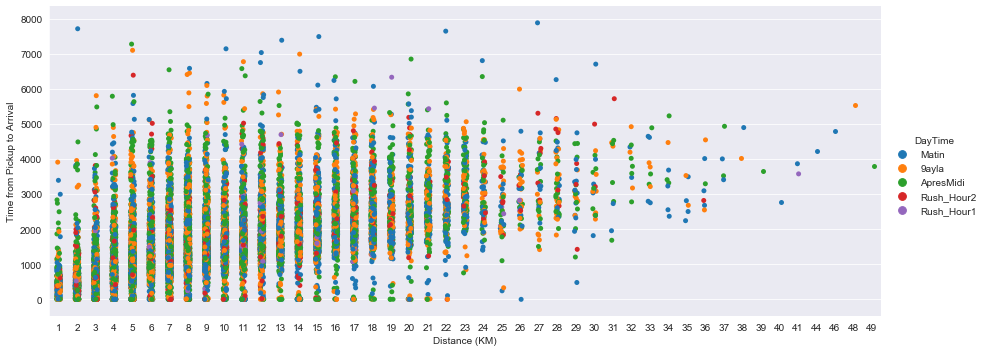

In [40]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="DayTime",
                   data=train, aspect=2.5, height=5, ci=80.0)

In [41]:
def weekend(x):
    if x not in (6,7):
        x=0
    else:
        x=1
    return(x)

In [42]:
train['Weekend']=train['Arrival at Pickup - Weekday (Mo = 1)'].apply(weekend)

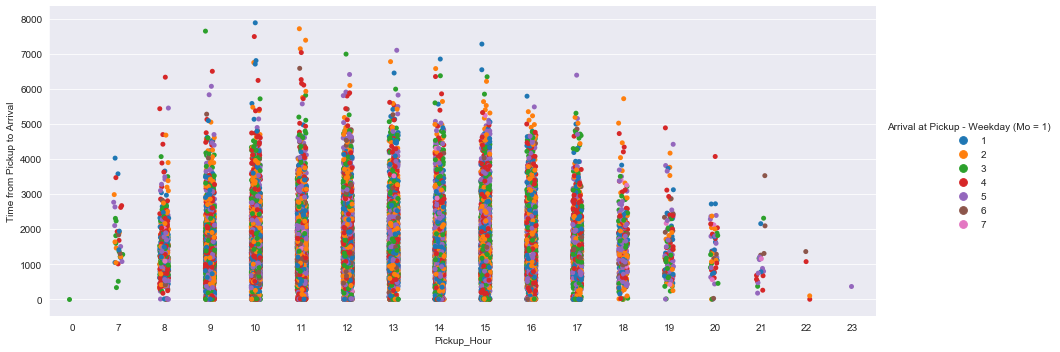

In [43]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

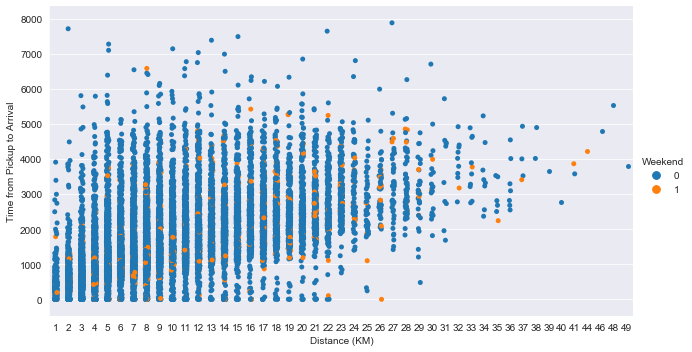

In [44]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Weekend",
                   data=train, aspect=1.8, height=5, ci=80)

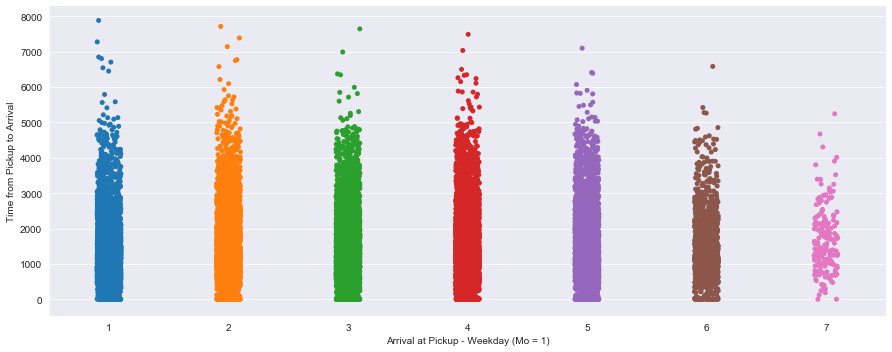

In [45]:
g = sns.catplot(x="Arrival at Pickup - Weekday (Mo = 1)", y="Time from Pickup to Arrival",
                   data=train, aspect=2.5, height=5, ci=80.0)

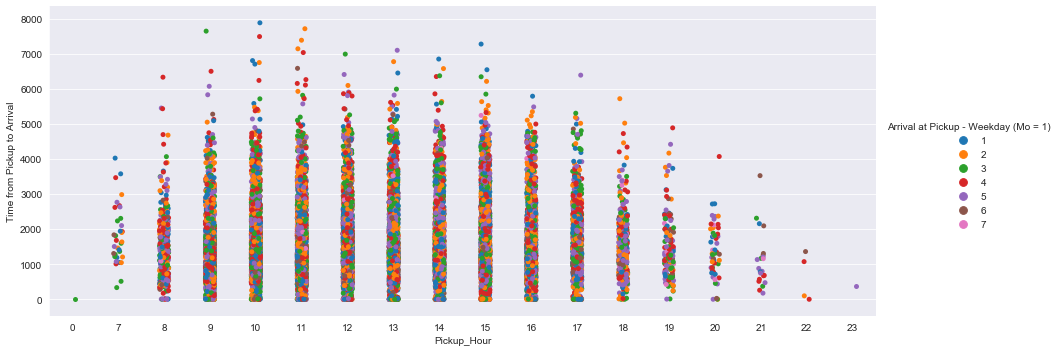

In [46]:
g = sns.catplot(x="Pickup_Hour", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

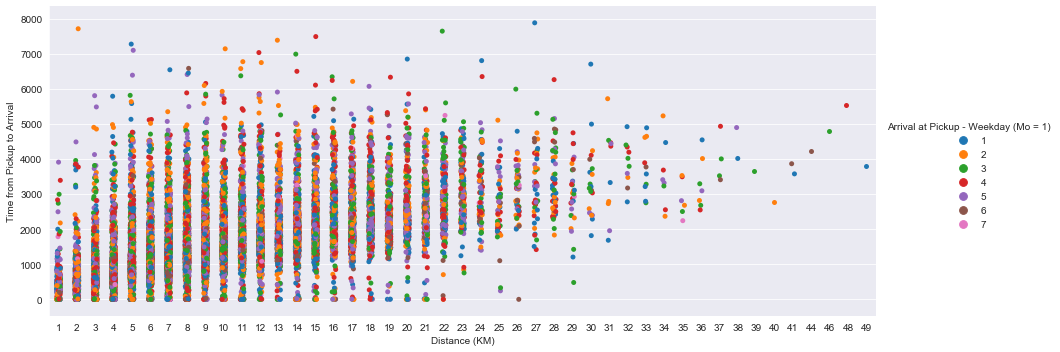

In [47]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",hue="Arrival at Pickup - Weekday (Mo = 1)",
                   data=train, aspect=2.5, height=5, ci=80.0)

## Feature Generation : Categorical ( pickup point and destination point and an interaction 

In [48]:
train['pos_pickup'] = train['Pickup Long'].apply(str)+'_'+train['Pickup Lat'].apply(str)
train['pos_dest'] = train['Destination Long'].apply(str)+'_'+train['Pickup Lat'].apply(str)
test['pos_pickup'] = test['Pickup Long'].apply(str)+'_'+test['Pickup Lat'].apply(str)
test['pos_dest'] = test['Destination Long'].apply(str)+'_'+test['Pickup Lat'].apply(str)
train['from_to']= train['pos_pickup']+'_'+train['pos_dest']
test['from_to']= test['pos_pickup']+'_'+test['pos_dest']

In [49]:
fasttrain= train[(train.Speed_Meter_per_Second>=15)].copy()
latetrain=train[(train.Speed_Meter_per_Second<=2)].copy()

In [50]:
longtime=train[train['Time from Pickup to Arrival']>=5000].copy()
lontime=train[train['Time from Pickup to Arrival']<5000].copy()

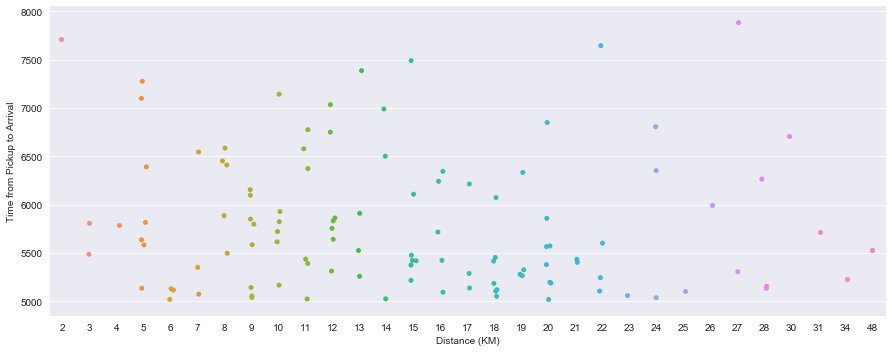

In [51]:
g = sns.catplot(x="Distance (KM)", y="Time from Pickup to Arrival",#col="cluster_destination",
                   data=longtime, aspect=2.5, height=5, ci=80.0)

In [52]:
longtime['Speed'] = (longtime['Distance (KM)']*1000)/(longtime['Time from Pickup to Arrival'])

In [53]:
longtime[longtime.Speed>=5]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,WrongOrders,error_rate_rider,Age_Year,Age_Month,DayTime,Weekend,pos_pickup,pos_dest,from_to,Speed
129,Order_No_7095,User_Id_265,Bike,3,Business,14,4,12:57:17 PM,14,4,...,2.000,0.118,3.000,41.000,9ayla,0,36.828195_-1.300921,37.016779299999996_-1.300921,36.828195_-1.300921_37.016779299999996_-1.300921,8.680
327,Order_No_10651,User_Id_1271,Bike,3,Business,3,5,4:14:44 PM,3,5,...,1.000,0.036,3.000,40.000,Rush_Hour2,0,36.897791999999995_-1.3244885,36.900920500000005_-1.3244885,36.897791999999995_-1.3244885_36.9009205000000...,5.432
2047,Order_No_12073,User_Id_3238,Bike,3,Business,29,3,1:21:35 PM,29,3,...,nan,nan,1.000,7.000,9ayla,0,36.7782792_-1.2454537,36.782965999999995_-1.2454537,36.7782792_-1.2454537_36.782965999999995_-1.24...,5.455
14558,Order_No_7222,User_Id_2828,Bike,3,Business,6,2,6:26:05 PM,6,2,...,nan,nan,2.000,21.000,Rush_Hour2,0,36.7928732_-1.2615888000000002,36.69308_-1.2615888000000002,36.7928732_-1.2615888000000002_36.69308_-1.261...,5.420
15070,Order_No_25590,User_Id_3262,Bike,3,Personal,19,2,4:01:38 PM,19,2,...,nan,nan,1.000,16.000,ApresMidi,0,36.838724600000006_-1.2876007999999999,37.005025_-1.2876007999999999,36.838724600000006_-1.2876007999999999_37.0050...,6.500
18537,Order_No_13311,User_Id_503,Bike,1,Business,22,3,4:37:38 PM,22,3,...,19.000,0.271,5.000,67.000,Rush_Hour2,0,36.7000029_-1.3169591,36.8756811_-1.3169591,36.7000029_-1.3169591_36.8756811_-1.3169591,5.089


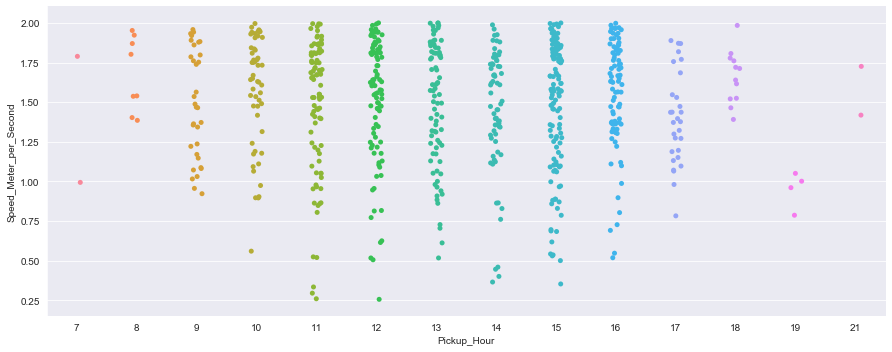

In [54]:
g = sns.catplot(x="Pickup_Hour", y="Speed_Meter_per_Second",#col="cluster_destination",
                   data=latetrain, aspect=2.5, height=5, ci=80.0)

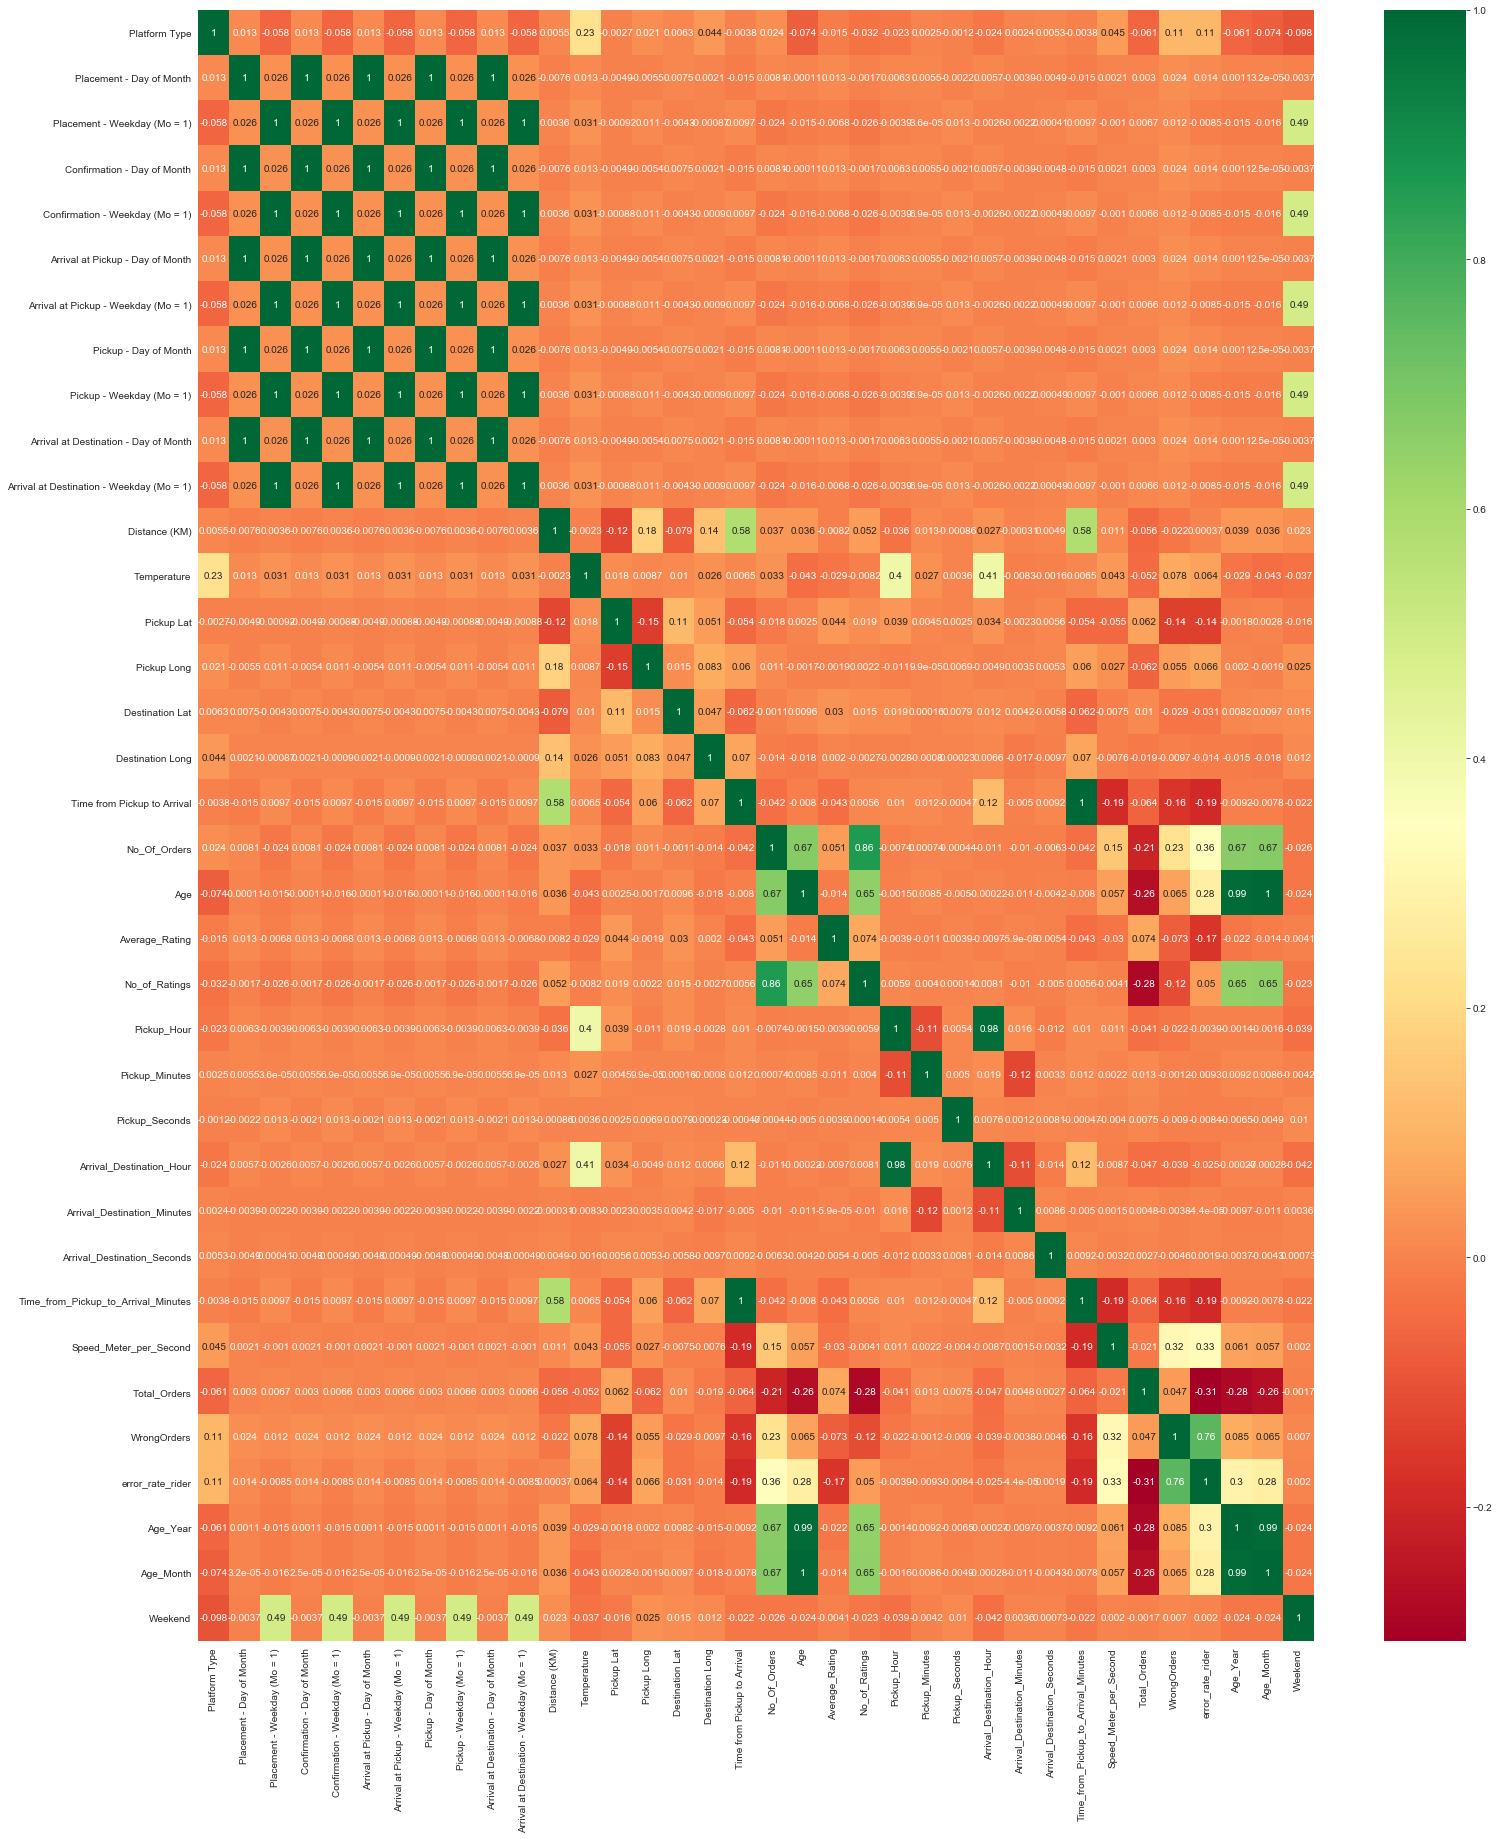

In [55]:
corrmat = train.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
rcParams['figure.figsize'] = 25, 30
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
normaltrain = train[(train.Speed_Meter_per_Second>2) & (train.Speed_Meter_per_Second<15)]